DEM has 317 rows, 351 columns, and cell size 1.05267790787e-05 m
(317, 351)


/home/csherwood/miniconda/envs/ioos/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


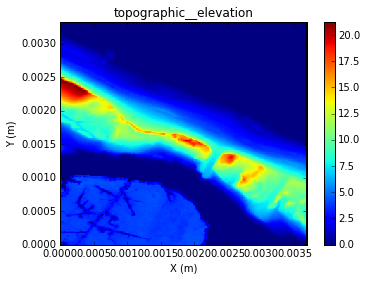

In [2]:
# sandwich wind model
import numpy as np
from landlab import RasterModelGrid

from landlab.components.diffusion.diffusion import LinearDiffuser
from landlab.plot.imshow import imshow_node_grid
from landlab.io.netcdf import *
from landlab.io import read_esri_ascii

from pylab import show, figure
%matplotlib inline

mg,z = read_esri_ascii('./sandwich_zoom.asc',reshape=1,name='topographic__elevation')
mg.axis_name
print('DEM has ' + str(mg.number_of_node_rows) + ' rows, ' +
                  str(mg.number_of_node_columns) + ' columns, and cell size ' + str(mg.dx)) + ' m'
# I could not figure out how to convert -9999.0 to no data, but I think making the water
# close to zero is actuapp better
z[z<-1]=-.0099
print np.shape(z)
mg.set_closed_boundaries_at_grid_edges(True, True, True, True)
figure()
imshow_node_grid(mg, 'topographic__elevation', cmap='jet', grid_units=['m','m'])
show()



In [11]:
# Add maps of scalar properties at the nodes:
#    Critical shear stress for mobilization

tcrit = 0.05*np.ones_like(z)
print np.shape(tcrit),tcrit
mg.add_field('node', 'tcrit', tcrit, units='Pa', copy=True, noclobber=False)

# or...
tcrit = mg.add_ones('node','tcrit')
print np.shape(tcrit),tcrit

# Calculate the slopes from the DEM delz = (dzdx,dzdy)
# This seems to want z to be a 1D array
delz = mg.calculate_gradients_at_active_links(tcrit)
print np.shape(delz),delz

# Make up a uniform vector field of wind direction U = (u,v) (at nodes or links?)

# Calculate wind stress (function of U and delz)

# Calculate flux vector Q = (qx,qy)

# Calculate flux divergence



(317, 351) [[ 0.05  0.05  0.05 ...,  0.05  0.05  0.05]
 [ 0.05  0.05  0.05 ...,  0.05  0.05  0.05]
 [ 0.05  0.05  0.05 ...,  0.05  0.05  0.05]
 ..., 
 [ 0.05  0.05  0.05 ...,  0.05  0.05  0.05]
 [ 0.05  0.05  0.05 ...,  0.05  0.05  0.05]
 [ 0.05  0.05  0.05 ...,  0.05  0.05  0.05]]
(111267,) [ 1.  1.  1. ...,  1.  1.  1.]
(219206,) [ 0.  0.  0. ...,  0.  0.  0.]


In [ ]:
whos